In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import netCDF4 as nc

fpath = './data/ndvi3g_geo_v1_2010_0106.nc4'
ncfile = nc.Dataset(fpath, 'r')

lon, lat = ncfile.variables['lon'][:], ncfile.variables['lat'][:]
latid = np.where((lat>=30.) * (lat<=80.))
lat = lat[latid]
yy0, yy1 = latid[0][0], latid[0][-1]+1

# NDVI data of June
ndvi = ncfile.variables['ndvi'][::2,yy0:yy1,:]/10000.
ndvi = ndvi[-1]
print(ndvi.shape)

# data out proper range > missing value
idx = np.where((ndvi<-0.3) + (ndvi>1.0))
ndvi[idx] = np.nan

(600, 4320)


c:\Users\admin\.conda\envs\clim\lib\site-packages\ipykernel_launcher.py:16: UserWarning: WARNING: valid_range not used since it
cannot be safely cast to variable data type
  app.launch_new_instance()


c:\Users\admin\.conda\envs\clim\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


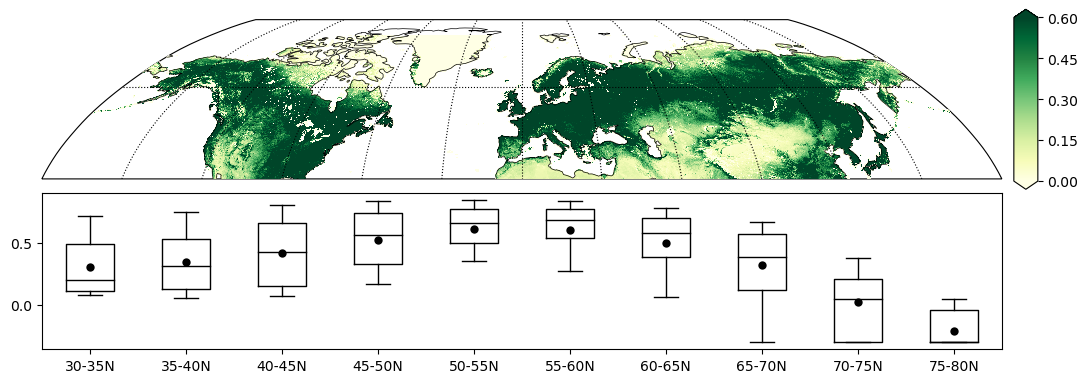

In [3]:
projection_type = ccrs.Robinson(central_longitude=0.)
minlon, maxlon, minlat, maxlat = -180., 180., 30., 90.

fig = plt.figure(figsize=(12,4), dpi=100)
gs0 = gridspec.GridSpec(1,1, left=0.1, right=0.90, top=0.95, bottom=0.5)
ax0 = plt.subplot(gs0[0], projection=projection_type)

# subplot for colorbar
cgs = gridspec.GridSpec(1, 1, left=0.91, right=0.93, top=0.95, bottom=0.5)
cax0 = plt.subplot(cgs[0])

# subplot for boxplot
gs1 = gridspec.GridSpec(1,1, left=0.1, right=0.90, top=0.49, bottom=0.1)
ax1 = plt.subplot(gs1[0])

# max and min NDVI value
minr, maxr = 0., 0.6    
lon2d, lat2d = np.meshgrid(lon, lat)

ax0.set_extent([minlon, maxlon, minlat, maxlat],
               crs = ccrs.PlateCarree())    


# plot NDVI spatial distribution
cs = ax0.pcolormesh(lon2d, lat2d, ndvi, cmap='YlGn',
                    transform=ccrs.PlateCarree(),
                    vmin=minr, vmax=maxr, zorder=4)
# longitude, latitude lines
ax0.gridlines(crs=ccrs.PlateCarree(), color='k',
              xlocs=np.arange(-180,180+30,30), ylocs=np.arange(-90.,90.1,30.),
              linestyle=':', zorder=7)
ax0.coastlines(linewidth=0.5, zorder=7)

clevs = np.linspace(minr, maxr, 5)  # levels for colorbar
cbar = plt.colorbar(cs, extend='both', cax=cax0, ticks=clevs, orientation='vertical')



datadict = {}
latcode = np.copy(ndvi)
for ii in range(10):
    lat0 = 30. + ii*5
    lat1 = 30. + (ii+1)*5.
    latid = np.where((lat>=lat0) * (lat<lat1))[0]
    yy0, yy1 = latid[0], latid[-1]+1    
    latcode[yy0:yy1,:] = ii     
    
    bandname = format(lat0, '2.0f') + '-' + format(lat1, '2.0f') + 'N' 
    idx = np.where((latcode==ii) * ~np.isnan(ndvi))
    datadict[bandname] = ndvi[idx]

ax1.boxplot(list(datadict.values()), showfliers=False, whis=[10,90],
            medianprops={'color':'k'}, showmeans=True,
            meanprops={'markerfacecolor':'k', 'markeredgecolor':'None', 'marker':'o'})
ax1.set_xticklabels(list(datadict.keys()))

plt.show()
